# MTpy Example 08

## Geoelectric Strike

Geoelectric strike indicates the preferred direction of electrical current flow.  The strike direction becomes important when you want to figure out which modes of the impedance tensor are which, namely the TE and TM modes.  TE is parallel to geoelectric strike and TM is perpendicular.  When modeling in 1D and 2D orienting your modes properly is important. Modeling in 3D removes this dependency because all 4 components can be modeled.   

MTpy provides 3 ways to estimate strike direction, through the impedance tensor invariants [Liley, 1998](https://doi.org/10.1190/1.1444481), the phase tensor azimuth [Caldwell et al., 2004](https://doi.org/10.1111/j.1365-246X.2004.02281.x), and the induction vector real azimuth.  

The plots are rose diagrams where up is North (0 degrees strike) and East is the right (90 degrees strike).  Therefore, strike is estimated as positive clockwise.  The strike angle is relative to the coordinate system of the transfer functions, in this case geographic North.  

You can plot the strike angles as a function of period (by decade), or you can use the `working_dataframe` to organize the strike angle by geographic region.  We will show both.  

**NOTE**: the induction vector or tipper angles should be perpendicular to the strike because they point towards a good conductor.  I left it this way because how perpendicular the tippers can be a good indication of dimensionality.   

In [1]:
from pathlib import Path
from mtpy import MTCollection
%matplotlib widget

2022-09-30 14:09:48,371 [line 135] error.get_mtpy_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy\logs\mtpy_error.log
2022-09-30 14:09:48,375 [line 135] matplotlib.get_mtpy_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy\logs\matplotlib_warn.log
2022-09-30 14:09:54,627 [line 44] mtpy.utils.gis_tools.<module> - INFO: INFO: GDAL version 3 detected
2022-09-30 14:09:56,724 [line 135] mth5.setup_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\logs\mth5_debug.log


### Open MTCollection

In the previous example we created a MTH5 file from existing Yellowstone data.  Let's open that file here for plotting.

In [2]:
mc = MTCollection()
mc.open_collection(Path().cwd().parent.parent.joinpath("data", "transfer_functions", "yellowstone_mt_collection.h5"))

## Plot Strike of All Stations

We have a large survey, so this may not be very useful as far as analysis, but useful to know we can do it.

In [3]:
tf_list = mc.get_tf_list()

### All Periods Together

Here we are plotting the strike estimation for all station and all periods into one rose diagram.  For an area this large, this plot is more or less useless.  But good to see.

2022-09-30 14:13:16,286 [line 894] mtpy.imaging.plot_strike.PlotStrike._plot_all_periods - INFO: Note: North is assumed to be 0 and the strike angle is measured clockwise positive.


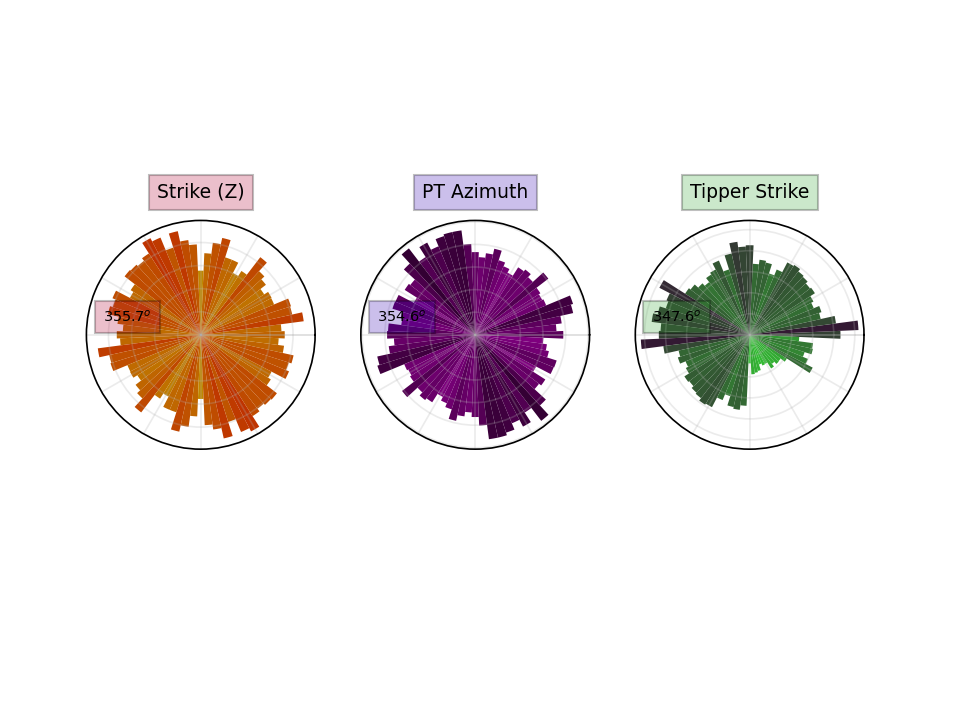

In [4]:
plot_strike_all = mc.plot_strike(tf_list=tf_list)

### Plot Per Decade

A more useful way to plot the strike angle is per period.  Again this is a large survey so these don't have too much useful information.  The numbers in the boxes under the plot are the median strike values for that decade. 

2022-09-30 14:16:43,630 [line 795] mtpy.imaging.plot_strike.PlotStrike._plot_per_period - INFO: Note: North is assumed to be 0 and the strike angle is measuredclockwise positive.


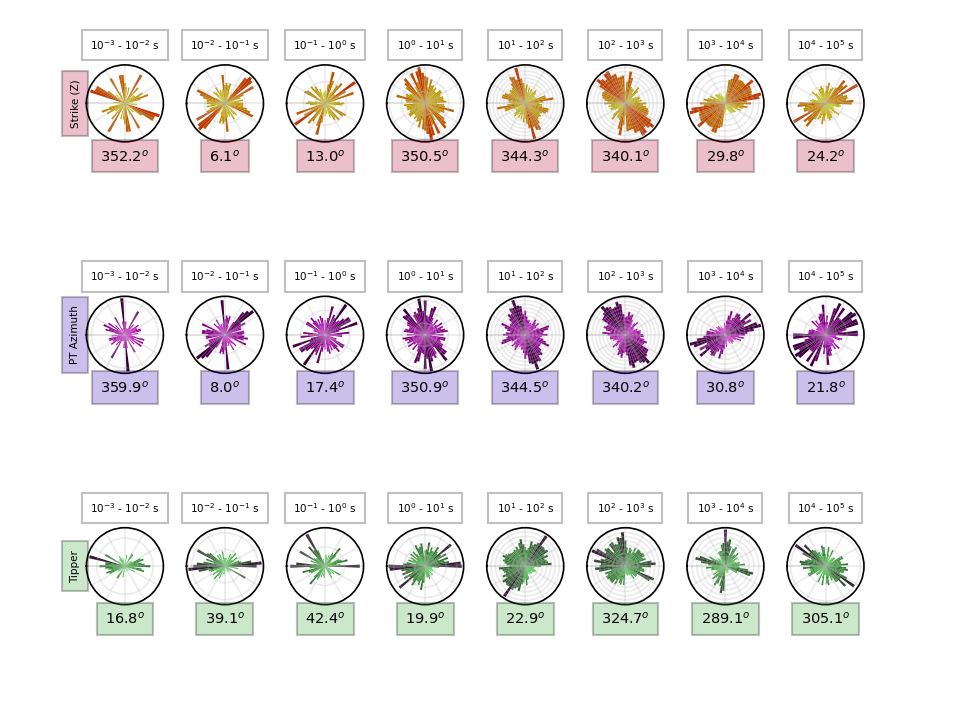

In [12]:
plot_strike_all.plot_type = 1
plot_strike_all.fig_num = 2
# to fit on a laptop screen
plot_strike_all.font_size = 3
plot_strike_all.redraw_plot()

## Plot DeGroot-Hedlin Line

The DeGroot-Hedlin line across the Snake River Plane is a good example to strike estimation.  The profile line is aligned northwest, which was picked to be approximately perpendicular to the geoelectric strike and key geologic structures. 

At most periods the geoelectric strike is roughly northeast with maybe 2 similar dominant strike angle, but notice the rotation between 100 - 1000 seconds, this could be near the Moho where there is a change from brittle to ductile material.  

In [25]:
mc.working_dataframe = mc.master_dataframe[mc.master_dataframe.station.str.startswith("SR2")]
dgh_tf_list = mc.get_tf_list()

2022-09-30 14:44:23,118 [line 795] mtpy.imaging.plot_strike.PlotStrike._plot_per_period - INFO: Note: North is assumed to be 0 and the strike angle is measuredclockwise positive.


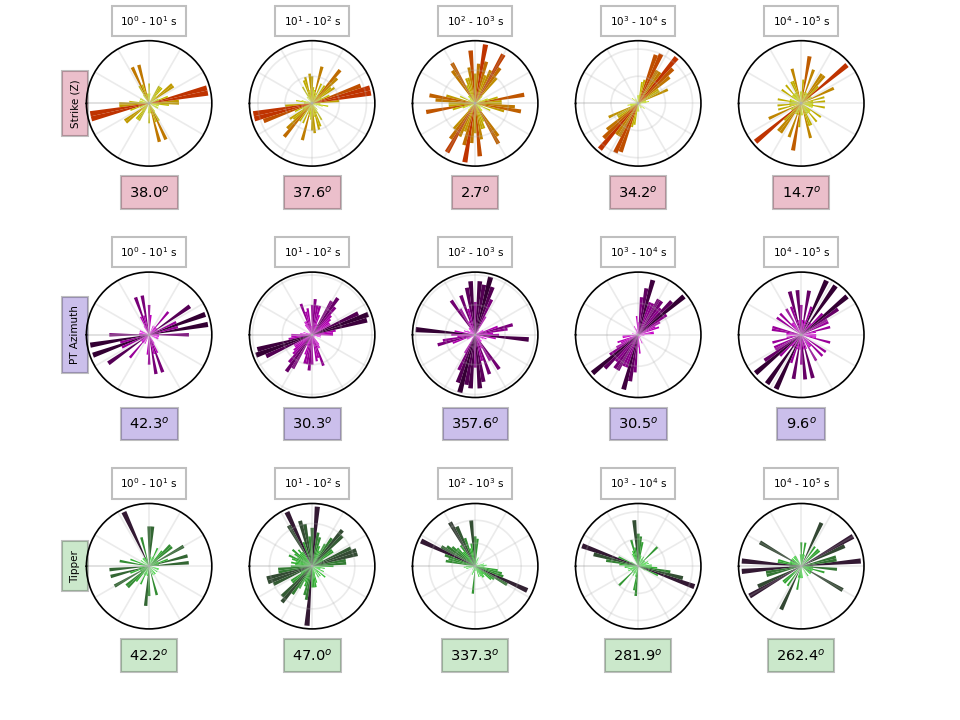

In [26]:
plot_strike_dgh = mc.plot_strike(tf_list=dgh_tf_list, plot_type=1, fig_num=4, font_size=3)

### Rotate to Geoelectric Strike

It can be informative to understand how homogeneous or hetergeneous the geoelectric strike angle is for each period.  If we rotate to the dominant strike direction N33E then will see how the strike angle varies with period. We will rotate by N33W so that N33E is up on the plot. The plot demonstrates that a change in geoelectric strike is observed between 100 - 1000 seconds.

2022-09-30 14:45:42,259 [line 132] mt_metadata.transfer_functions.core.TF.rotation_angle - INFO: Rotated transfer function by: -30.000 degrees clockwise
2022-09-30 14:45:42,316 [line 132] mt_metadata.transfer_functions.core.TF.rotation_angle - INFO: Rotated transfer function by: -30.000 degrees clockwise
2022-09-30 14:45:42,364 [line 132] mt_metadata.transfer_functions.core.TF.rotation_angle - INFO: Rotated transfer function by: -30.000 degrees clockwise
2022-09-30 14:45:42,406 [line 132] mt_metadata.transfer_functions.core.TF.rotation_angle - INFO: Rotated transfer function by: -30.000 degrees clockwise
2022-09-30 14:45:42,451 [line 132] mt_metadata.transfer_functions.core.TF.rotation_angle - INFO: Rotated transfer function by: -30.000 degrees clockwise
2022-09-30 14:45:42,503 [line 132] mt_metadata.transfer_functions.core.TF.rotation_angle - INFO: Rotated transfer function by: -30.000 degrees clockwise
2022-09-30 14:45:42,551 [line 132] mt_metadata.transfer_functions.core.TF.rotation

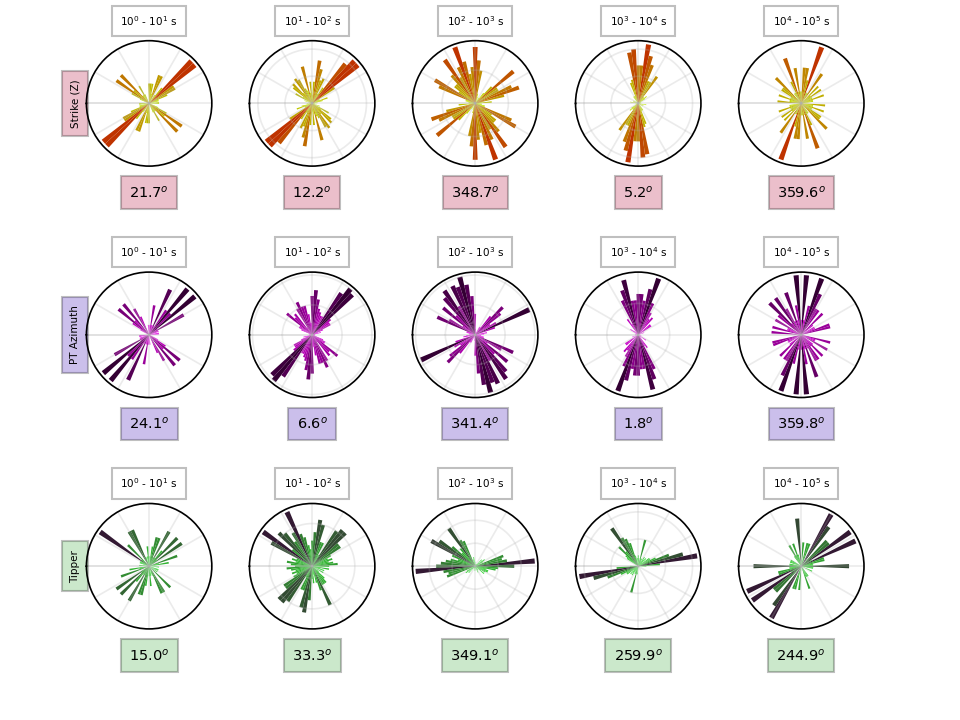

In [27]:
plot_strike_dgh.rotation_angle = -30
plot_strike_dgh.fig_num = 6
plot_strike_dgh.redraw_plot()

### Plot by Geologic Region

We can estimate various geologic regions from the map.  Looks like:

  - Stations "SR205 to "SR232" are in mountains to the north
  - Stations "SR232" to "SR255" are in the Snake River Plane
  - Stations "SR255" to "SR290" are in mountains to the south

2022-09-30T14:47:46 [line 140] rasterio._env.open - INFO: GDAL signalled an error: err_no=4, msg="`/vsimem/e23917af-8091-4362-9f69-f0821b384837/e23917af-8091-4362-9f69-f0821b384837.tif' not recognized as a supported file format."


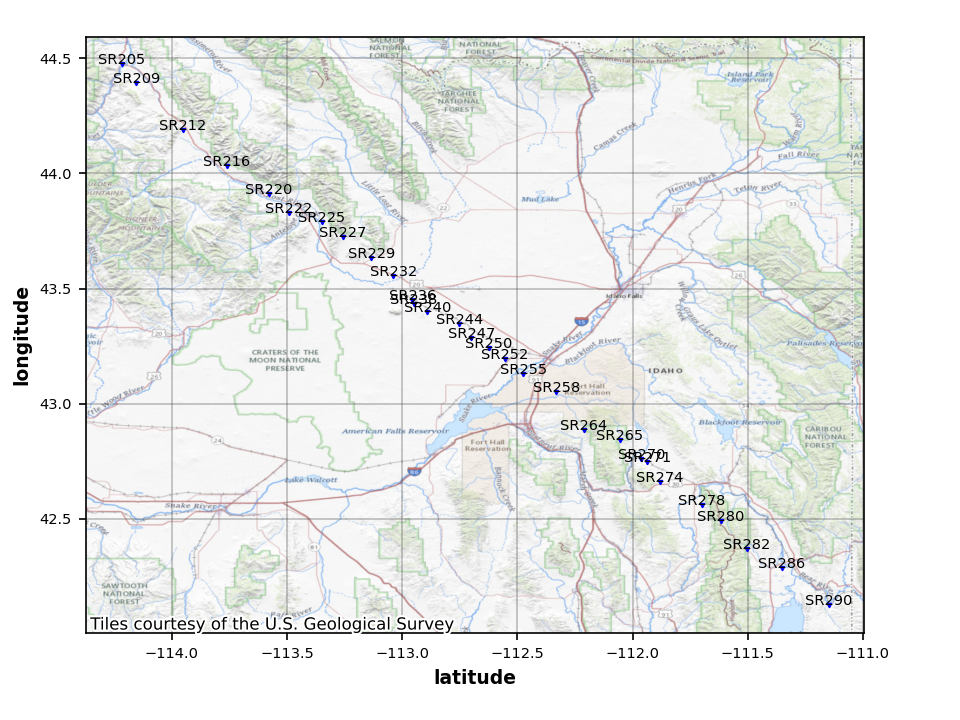

In [29]:
plot_stations = mc.plot_stations(fig_num=8)

In [60]:
# Need to make this from the master and make it a list so that it doesn't get over written 
# when we set the working dataframe
dgh_stations = list(mc.master_dataframe[mc.master_dataframe.station.str.startswith("SR2")].station.unique())

#### Northern Stations

In [39]:
northern_stations = [station for station in dgh_stations if int(station[2:]) < 233]
mc.working_dataframe = mc.master_dataframe[mc.master_dataframe.station.isin(northern_stations)]
northern_tf_list = mc.get_tf_list()

2022-09-30 14:58:43,276 [line 795] mtpy.imaging.plot_strike.PlotStrike._plot_per_period - INFO: Note: North is assumed to be 0 and the strike angle is measuredclockwise positive.


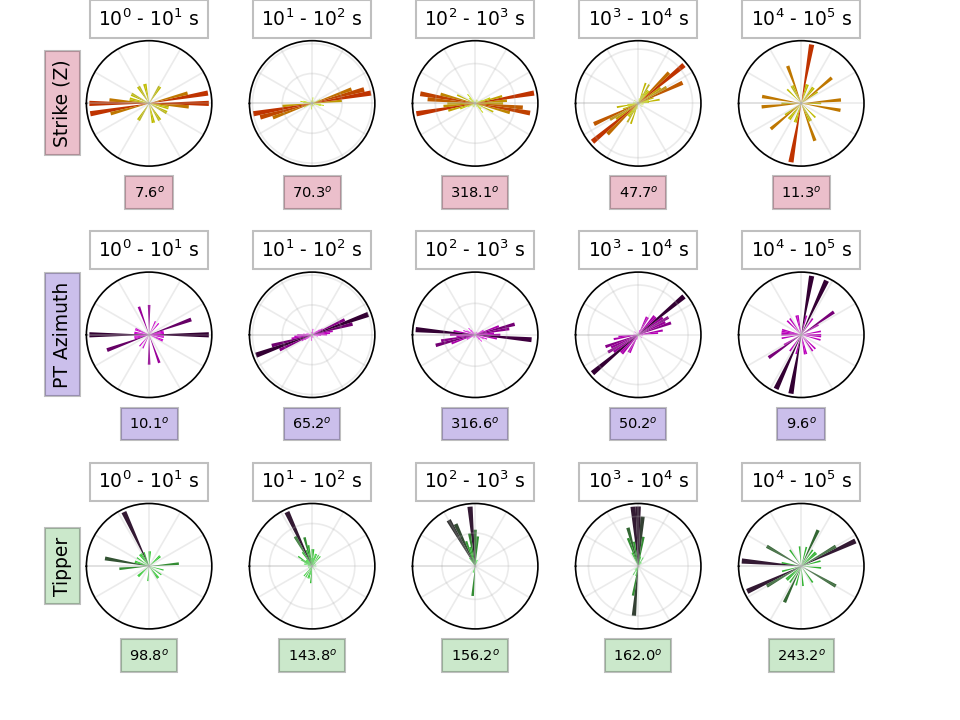

In [40]:
plot_northern_strike = mc.plot_strike(tf_list=northern_tf_list, fig_num=9, plot_type=1)

#### Snake River Plane Stations

In [59]:
snp_stations = [station for station in dgh_stations 
                if int(station[2:]) > 231 and int(station[2:]) < 259]
mc.working_dataframe = mc.master_dataframe[mc.master_dataframe.station.isin(snp_stations)]
snp_tf_list = mc.get_tf_list()

2022-09-30 15:11:05,555 [line 795] mtpy.imaging.plot_strike.PlotStrike._plot_per_period - INFO: Note: North is assumed to be 0 and the strike angle is measuredclockwise positive.


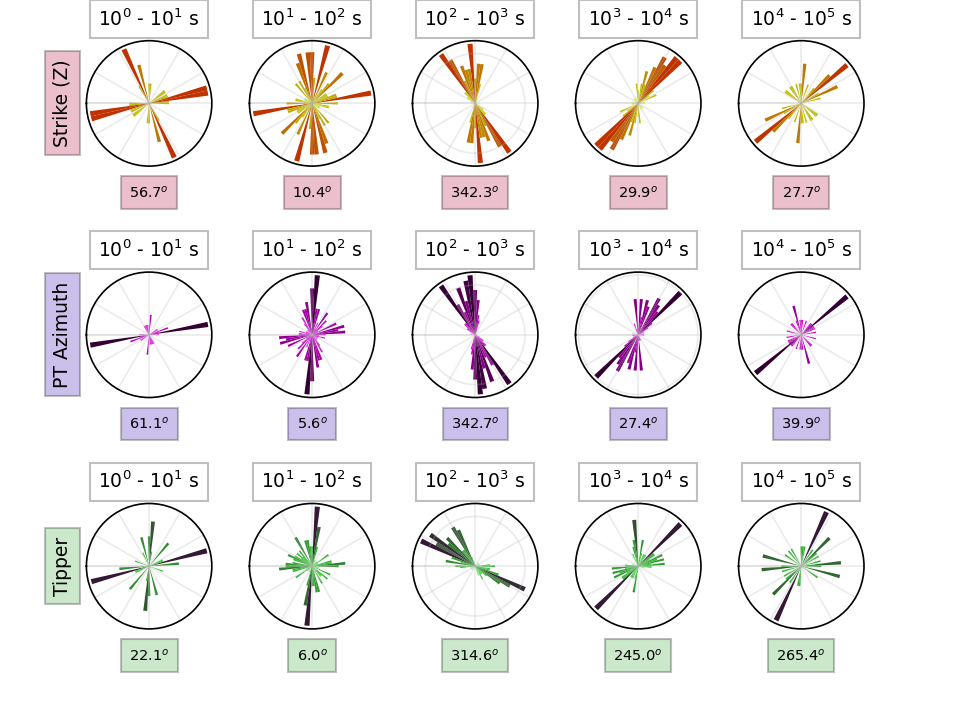

In [62]:
plot_snp_strike = mc.plot_strike(tf_list=snp_tf_list, fig_num=11, plot_type=1)

#### Southern Stations

In [64]:
southern_stations = [station for station in dgh_stations if int(station[2:]) > 257]
mc.working_dataframe = mc.master_dataframe[mc.master_dataframe.station.isin(southern_stations)]
southern_tf_list = mc.get_tf_list()

2022-09-30 15:13:18,494 [line 795] mtpy.imaging.plot_strike.PlotStrike._plot_per_period - INFO: Note: North is assumed to be 0 and the strike angle is measuredclockwise positive.


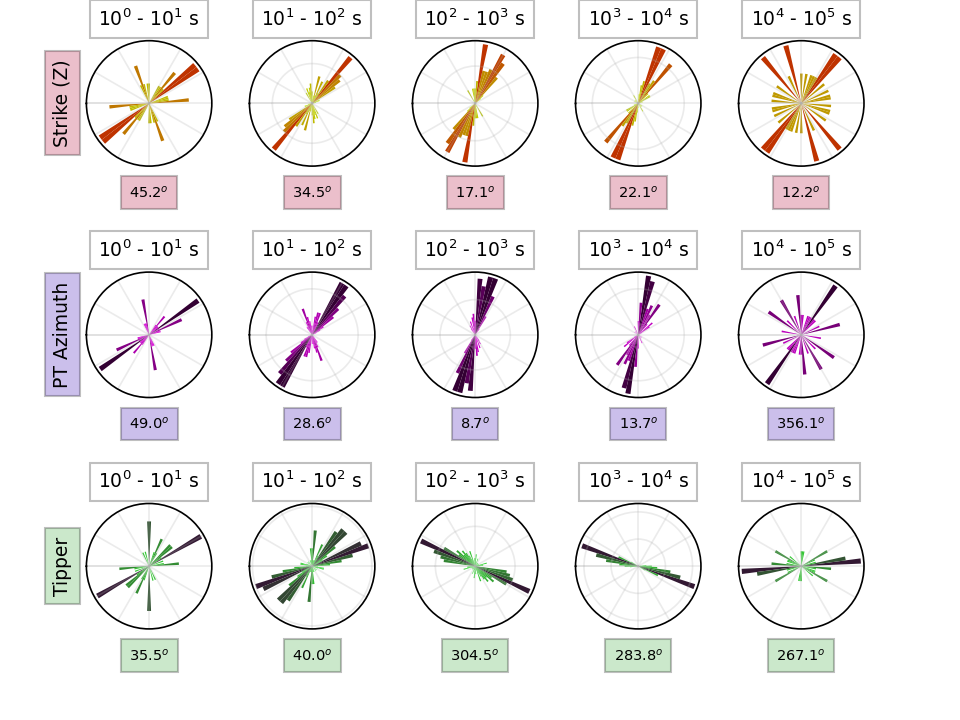

In [65]:
plot_southern_strike = mc.plot_strike(tf_list=southern_tf_list, fig_num=12, plot_type=1)

## Close MTCollection

In [66]:
mc.close_collection()

2022-09-30 15:14:15,963 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mt_examples\data\transfer_functions\yellowstone_mt_collection.h5
